# Linear Regression Single Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
data = {
    'Area':[26000,30000,32000,36000,40000],
    'Price':[550000,560000,610000,680000,725000]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Area,Price
0,26000,550000
1,30000,560000
2,32000,610000
3,36000,680000
4,40000,725000


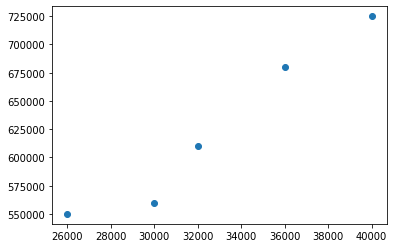

In [5]:
plt.scatter(df['Area'],df['Price'])

In [6]:
reg = linear_model.LinearRegression()

In [7]:
reg.fit(df[['Area']],df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.predict([[30000],[32000]])

array([586643.83561644, 614041.09589041])

In [9]:
pred = reg.predict(df[['Area']])
pred

array([531849.31506849, 586643.83561644, 614041.09589041, 668835.61643836,
       723630.1369863 ])

In [10]:
new = pd.DataFrame(df['Area'])
new['Predicted'] = pd.DataFrame(pred)
new['Actual'] = pd.DataFrame(df['Price'])
new.drop(['Area'],axis=1,inplace = True)

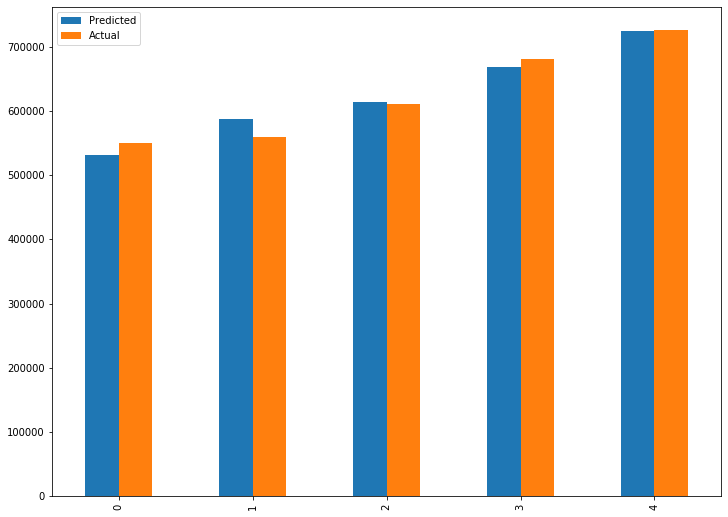

In [28]:
new.plot(kind='bar',figsize=(12,9))

In [12]:
reg.coef_

array([13.69863014])

In [13]:
reg.intercept_

175684.93150684936

In [14]:
d = pd.read_csv('areas.csv')

In [15]:
d.head(3)

,area
0,1000
1,4700
2,3000


In [16]:
d['Prices'] = reg.predict(d)

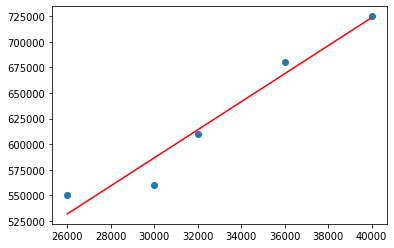

In [17]:
plt.scatter(df['Area'],df['Price'])
plt.plot(df.Area,reg.predict(df[['Area']]), color = 'red')

In [18]:
d

,area,Prices
0,1000,189383.561644
1,4700,240068.493151
2,3000,216780.821918
3,2000,203082.191781
4,2560,210753.424658
5,5000,244178.082192
6,6540,265273.972603
7,8000,285273.972603
8,6500,264726.027397
9,9620,307465.753425


In [19]:
#d.to_csv("Predictions.csv")

# Another Example

In [20]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
df_X = pd.DataFrame(diabetes_X)
df_y = pd.DataFrame(diabetes_y)

In [22]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [23]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [25]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


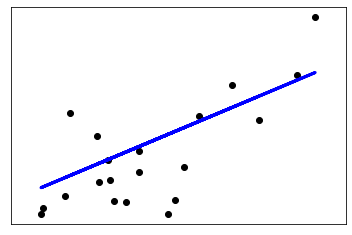

In [26]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()